In [1]:
!pip install vtk

     |████████████████████████████████| 88.3 MB 45.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 52.1 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 49.3 MB/s eta 0:00:01
     |████████████████████████████████| 308 kB 38.2 MB/s eta 0:00:01
     |████████████████████████████████| 158 kB 56.0 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
import numpy as np
import vtk
import matplotlib.pyplot as plt
import os 

In [8]:
cd data/

/media/brayanb1701/Datos/RisingSim/data


In [11]:
dirs = os.listdir()
print(dirs)

['porcelain_1.92r_1A30f', 'porcelain_2.3r_1A30f', 'porcelain_2.6r_1A10f', 'porcelain_2.6r_1A30f', 'porcelain_2.6r_1A90f', 'porcelain_2.6r_2A30f', 'porcelain_2.6r_5A30f']


In [53]:
zs=np.empty((0,1050))
for j in dirs:
    z=np.array([])
    for i in range(1500000,12000000,10000):
        filename = str(j)+'/intruder_'+str(i)+'.vtk'
        reader = vtk.vtkGenericDataObjectReader()
        reader.SetFileName(filename)
        reader.Update()
        points = np.array( reader.GetOutput().GetPoints().GetData() )
        z=np.append(z,points[0][2])
    print(z)
    #z=z.reshape((1,len(z)))
    z=np.array([z])
    zs=np.concatenate((zs,z),axis=0)
print(zs.shape)

[0.022119  0.0435799 0.0644425 ... 0.107503  0.107503  0.107503 ]
[0.0363953 0.0600664 0.0833272 ... 0.119486  0.119486  0.119486 ]
[0.0437451 0.0513339 0.0582013 ... 0.0526524 0.0526524 0.0526524]
[0.0437451 0.0674676 0.0907742 ... 0.122886  0.122886  0.122886 ]
[0.0437451 0.107061  0.089591  ... 0.0315994 0.0315994 0.0315994]
[0.0437451 0.0916784 0.101534  ... 0.10042   0.10042   0.10042  ]
[0.0437451 0.161671  0.0821287 ... 0.0474901 0.0474901 0.0474901]
(7, 1050)


In [54]:
print(zs)

[[0.022119  0.0435799 0.0644425 ... 0.107503  0.107503  0.107503 ]
 [0.0363953 0.0600664 0.0833272 ... 0.119486  0.119486  0.119486 ]
 [0.0437451 0.0513339 0.0582013 ... 0.0526524 0.0526524 0.0526524]
 ...
 [0.0437451 0.107061  0.089591  ... 0.0315994 0.0315994 0.0315994]
 [0.0437451 0.0916784 0.101534  ... 0.10042   0.10042   0.10042  ]
 [0.0437451 0.161671  0.0821287 ... 0.0474901 0.0474901 0.0474901]]


In [55]:
t=np.arange(1500000,12000000,10000)*1e-6

Text(0.5, 1.0, 'Comparison of h(t) in simulations changing intruder size')

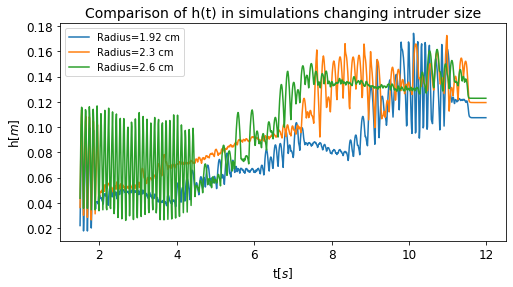

In [61]:
plt.figure(figsize=(8,4))
plt.plot(t,zs[0],label="Radius=1.92 cm")
plt.plot(t,zs[1],label="Radius=2.3 cm")
plt.plot(t,zs[3],label="Radius=2.6 cm")
plt.legend()
plt.ylabel('h$[m]$',fontdict={'fontsize':12})
plt.xlabel('t$[s]$',fontdict={'fontsize':12})
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.title('Comparison of h(t) in simulations changing intruder size',fontdict={'fontsize':14})

Text(0.5, 1.0, 'Comparison of h(t) in simulations changing frequency')

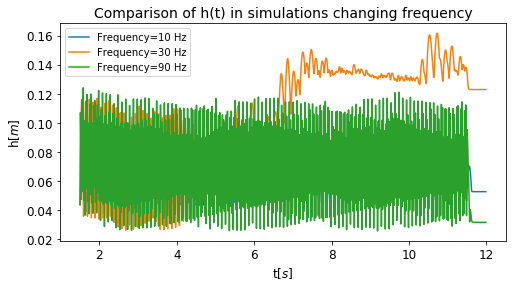

In [63]:
plt.figure(figsize=(8,4))
plt.plot(t,zs[2],label="Frequency=10 Hz")
plt.plot(t,zs[3],label="Frequency=30 Hz")
plt.plot(t,zs[4],label="Frequency=90 Hz")
plt.legend()
plt.ylabel('h$[m]$',fontdict={'fontsize':12})
plt.xlabel('t$[s]$',fontdict={'fontsize':12})
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.title('Comparison of h(t) in simulations changing frequency',fontdict={'fontsize':14})

Text(0.5, 1.0, 'Comparison of h(t) in simulations changing amplitude')

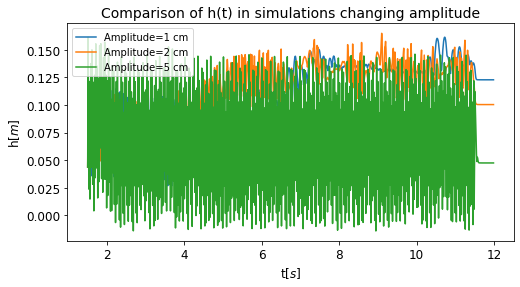

In [64]:
plt.figure(figsize=(8,4))
plt.plot(t,zs[3],label="Amplitude=1 cm")
plt.plot(t,zs[5],label="Amplitude=2 cm")
plt.plot(t,zs[6],label="Amplitude=5 cm")
plt.legend()
plt.ylabel('h$[m]$',fontdict={'fontsize':12})
plt.xlabel('t$[s]$',fontdict={'fontsize':12})
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.title('Comparison of h(t) in simulations changing amplitude',fontdict={'fontsize':14})